In [3]:
# Word-level one-hot encoding
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_length = 10
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [4]:
# Character-level one-hot encoding
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

# IMDB movie-review sentiment prediction

In [6]:
# Loading the IMDB data for use with an Embedding layer

from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen= maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


In [8]:
# Using an Embedding layer and classifier on the IMDB data

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

model = Sequential()

model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6704 - acc: 0.6158 - val_loss: 0.6238 - val_acc: 0.6906
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5492 - acc: 0.7465 - val_loss: 0.5330 - val_acc: 0.7296
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4670 - acc: 0.7856 - val_loss: 0.5045 - 

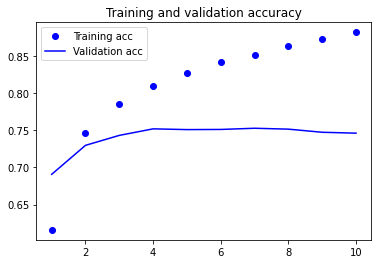

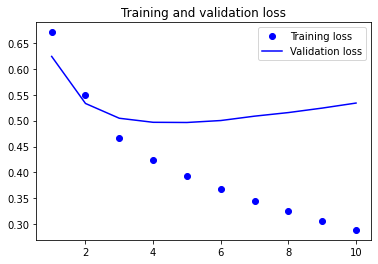

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.fit(x_train, y_train, epochs=4, batch_size=32, validation_split=0.2)

Epoch 1/4
625/625 [==============================] - 1s 2ms/step - loss: 0.2728 - acc: 0.8902 - val_loss: 0.5453 - val_acc: 0.7444
Epoch 2/4
625/625 [==============================] - 1s 2ms/step - loss: 0.2575 - acc: 0.8964 - val_loss: 0.5579 - val_acc: 0.7442
Epoch 3/4
625/625 [==============================] - 1s 2ms/step - loss: 0.2432 - acc: 0.9059 - val_loss: 0.5718 - val_acc: 0.7420
Epoch 4/4
625/625 [==============================] - 1s 2ms/step - loss: 0.2295 - acc: 0.9132 - val_loss: 0.5852 - val_acc: 0.7372


# Downloading the IMDB Data as Raw Text

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import os, shutil, zipfile
local_zip = '/content/drive/MyDrive/data/aclImdb.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
# Downloading the IMDB Data as Raw Text
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
          f = open(os.path.join(dir_name, fname)) 
          texts.append(f.read())
          f.close()
          if label_type == 'neg':
            labels.append(0)
          else:
            labels.append(1)

In [24]:
# Tokenizing the text of the raw IMDB data

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)


Found 88582 unique tokens.


In [25]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


# GloVe word-embeddings

In [28]:
local_zip = '/content/drive/MyDrive/data/glove.6B.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/glove.6B')
zip_ref.close()

In [29]:
# Parsing the GloVe word-embeddings file

glove_dir = '/content/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [30]:
# Preparing the GloVe word-embeddings matrix

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [31]:
#model difinition

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Loading pertained word embeddings into the Embedding layer

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [33]:
# Training and evaluation

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 134ms/step - loss: 2.3951 - acc: 0.5100 - val_loss: 0.6987 - val_acc: 0.5432
Epoch 2/10
7/7 [==============================] - 1s 97ms/step - loss: 0.5344 - acc: 0.6750 - val_loss: 1.3673 - val_acc: 0.4997
Epoch 3/10
7/7 [==============================] - 1s 113ms/step - loss: 0.4005 - acc: 0.8350 - val_loss: 1.7733 - val_acc: 0.5003
Epoch 4/10
7/7 [==============================] - 1s 98ms/step - loss: 0.3929 - acc: 0.8650 - val_loss: 0.7788 - val_acc: 0.5439
Epoch 5/10
7/7 [==============================] - 1s 112ms/step - loss: 0.3732 - acc: 0.8000 - val_loss: 0.7056 - val_acc: 0.5772
Epoch 6/10
7/7 [==============================] - 1s 113ms/step - loss: 0.0902 - acc: 1.0000 - val_loss: 0.8237 - val_acc: 0.5391
Epoch 7/10
7/7 [==============================] - 1s 96ms/step - loss: 0.0724 - acc: 1.0000 - val_loss: 0.7226 - val_acc: 0.5801
Epoch 8/10
7/7 [==============================] - 1s 96ms/step - loss: 0.0384 - acc: 1.0000 -

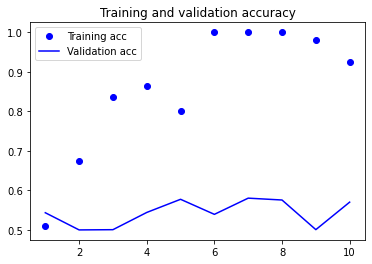

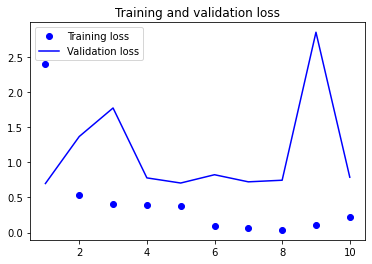

In [34]:
# Plotting the Results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
# Training the same Model without pretrained word embeddings

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 140ms/step - loss: 0.6931 - acc: 0.5250 - val_loss: 0.6927 - val_acc: 0.5123
Epoch 2/10
7/7 [==============================] - 1s 124ms/step - loss: 0.5359 - acc: 0.9800 - val_loss: 0.6965 

In [36]:
# Tokenizing the data of the test set

test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


In [37]:
# Evaluating the model on the test set

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7958 - acc: 0.5673


[0.7958446145057678, 0.5672799944877625]